# Séries estacionárias

por **Cibele Russo**

Baseado em 

- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.
- Ehlers, R.S. (2009) Análise de Séries Temporais, http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf. Acessado em 28/06/2020.


Leituras adicionais recomendadas

- Boxplots https://pt.wikipedia.org/wiki/Diagrama_de_caixa

- Boxplots usando o pacote seaborn https://seaborn.pydata.org/generated/seaborn.boxplot.html

- Teste para raiz unitária
https://en.wikipedia.org/wiki/Unit_root_test

- Teste de Dickey-Fuller aumentado https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test.


## Estacionariedade

Como as séries temporais são realizações de processos estocásticos, estudaremos um pouco as características de processos estocásticos estacionários.


**Definição**

Um processo estocástico é dito ser **estritamente estacionário** se a distribuição de probabilidade conjunta de $Z (t_1 ), \ldots , Z (t_k )$ é a mesma de $Z (t_1+\tau), \ldots , Z (t_k +\tau)$.

Ou seja, o deslocamento da origem dos tempos por uma quantidade $\tau$ não tem efeito na distribuição conjunta que portanto depende apenas dos intervalos entre $t_1,\ldots,t_k$.




Para $k=1$, a estacionariedade estrita implica que a distribuição de $Z_t$ é a mesma para todo $t$ de modo que, se os primeiros momentos forem finitos,

$$\mu(t) = \mu \mbox{ e } \sigma^2(t) = \sigma^2\ \  \forall t$$


Para $k=2$, a distribuição conjunta de $Z(t_1)$ e $Z(t_2)$ depende apenas da distância $t_2-t_1$.

A **função de autocovariância** também depende apenas de $t_2-t_1$ e pode ser escrita como $\gamma(\tau)$:

$$\gamma(\tau) = E [(Z (t) − \mu)(Z (t + \tau ) − \mu)] = Cov(Z (t), Z (t + \tau )).$$

$\gamma(\tau)$ é chamado de coeficiente de autocovariância na defasagem $\tau$.

Note que o tamanho de $\gamma(\tau)$ depende da escala de $Z(t)$. Uma quantidade livre de escala é a **função de autocorrelação**

$$\rho(\tau) = \displaystyle\frac{\gamma(\tau)}{\gamma(0)}.$$


Na prática é muito difı́cil usar a definição de estacionariedade estrita e costuma-se definir estacionariedade de uma forma menos restrita.



**Definição**

Um processo estocástico $\{ Z (t), t \in \mathcal{T} \}$ é dito ser **estacionário de segunda ordem ou fracamente estacionário** se a sua função média é constante e sua função de autocovariância depende apenas da
defasagem,

$E(Z(t))  = \mu,\  \forall t$ e 

$ Cov [Z (t), Z (t + \tau )] =  E [Z (t) − \mu][Z (t + \tau ) − \mu] = \gamma(\tau) \ \forall t $



- Nenhuma outra suposição é feita a respeito dos momentos de ordem mais alta.

- Fazendo $\tau = 0$ segue que $Var [Z (t)] = \gamma(0), \forall t$.

- Tanto a média quanto a variância precisam ser finitos.



**Definição**

Um processo estocástico é dito ser um processo **Gaussiano** se, para qualquer conjunto $\{ t_1 , t_ 2 , \ldots , t_n\}$ as variáveis aleatórias $Z (t_1 ), Z (t_2 ), \ldots , Z (t_n )$ tem distribuição normal multivariada.

- A distribuição normal multivariada fica completamente caracterizada pelo primeiro e segundo momentos, ou seja, média,variâncias e covariâncias.


- **Estacionariedade fraca implica em estacionariedade estrita para processos Gaussianos.**


- Por outro lado, $\mu$ e $\gamma(t)$ podem não descrever adequadamente processos que se afastem muito da normalidade.


Já vimos na primeira aula um **passeio aleatório**


$$Z_t = Z_{t-1}+\epsilon_t.$$


A série temporal se desenvolve no tempo de forma aleatória ao redor de uma média constante? 

A maior parte das séries temporais não! Em geral, as séries de tempo apresentam *tendências*, positivas ou negativas, que podem ser lineares ou não lineares.



## Séries estacionárias

- Uma série temporal é estacionária se a sua média, variância e autocovariância são fixas para quaisquer dois pontos equidistantes. Isso significa que, independente de onde tomarmos um subconjunto da série, a **média, variância, autocorrelação devem se manter constantes**.


- Uma série que apresenta sazonalidade ou tendência não é estacionária.





## Transformações para buscar estacionariedade

#### Diferenças da série original

Como a maioria dos procedimentos da análise estatística das séries temporais supõe estacionariedade, pode ser necessário transformar os dados originais para obter uma série estacionária. 

A transformação (filtro) mais comum consiste em tomar _diferenças sucessivas_ da série original, até obter uma série estacionária.

* Primeira diferença

$$\Delta Z(t) = Z(t) - Z(t-1)$$

* Segunda diferença

$$\Delta^2 Z(t) = \Delta(\Delta(Z(t))) = \Delta(Z(t) - Z(t-1)) $$

$$\Delta^2 Z(t)  = Z(t) - 2 Z(t-1) + Z(t-2)$$



### Exemplos:

1. Considere os dados dos passageiros. A série é estacionária? A primeira diferença é estacionária?

2. Considere a série de mortes da COVID-19 em SP. Ela é estacionária? A primeira diferença é estacionária?

Veremos outros exemplos!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
pkgdir = 'dados'

passageiros = pd.read_csv(f'{pkgdir}/airline_passengers.csv', index_col=0, parse_dates=True)

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


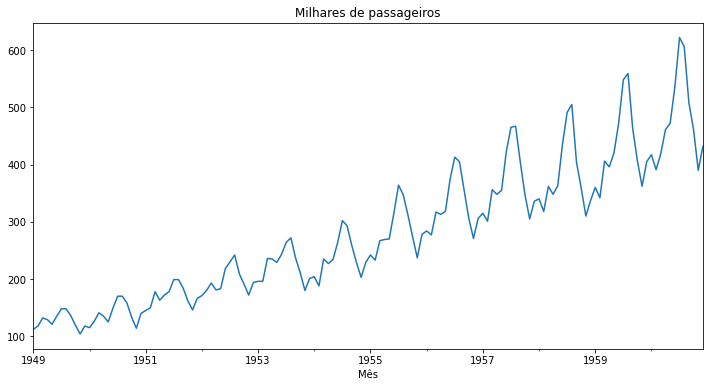

In [2]:
passageiros['Milhares de passageiros'].plot(figsize=(12,6), title='Milhares de passageiros');

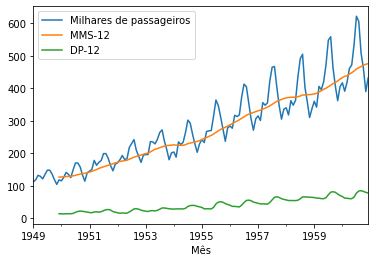

In [3]:
# Verificando as séries de média e desvio-padrão móvel com janela de 12 meses

passageiros['MMS-12'] = passageiros['Milhares de passageiros'].rolling(window=12).mean()
passageiros['DP-12'] = passageiros['Milhares de passageiros'].rolling(window=12).std()

passageiros[['Milhares de passageiros','MMS-12','DP-12']].plot();

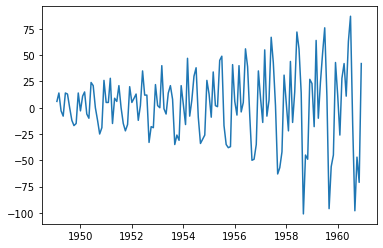

In [4]:
# Primeiras diferenças
y = np.diff(passageiros['Milhares de passageiros'])
x = passageiros.iloc[1:].index

plt.plot(x,y);

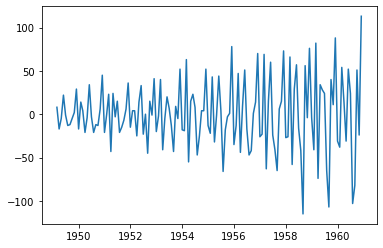

In [5]:
# Segundas diferenças
y2 = np.diff(y)
x2 = x[1:]

plt.plot(x2,y2);

## Boxplots por períodos

Veja mais em

https://pt.wikipedia.org/wiki/Diagrama_de_caixa

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:xlabel='Ano', ylabel='Milhares de passageiros'>

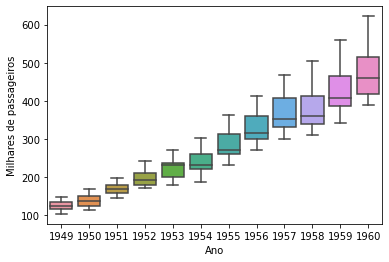

In [6]:
import seaborn as sns

passageiros['Ano'] = passageiros.index.year


sns.boxplot(x=passageiros['Ano'], y=passageiros['Milhares de passageiros'])

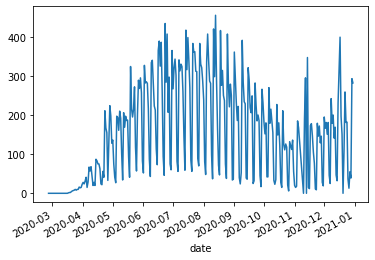

In [7]:
# Mortes por COVID-19 no estado de SP

# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
pkgdir = 'dados'

covidSP = pd.read_csv(f'{pkgdir}/covidSP.csv', index_col=0, parse_dates=True)


covidSP['deaths'].plot();


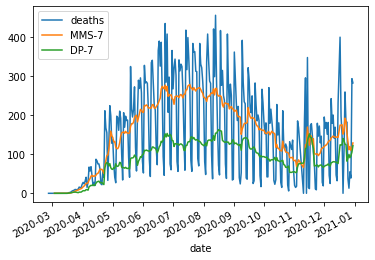

In [8]:
# Verificando as séries de média e desvio-padrão móvel com janela de 7 dias

covidSP['MMS-7'] = covidSP['deaths'].rolling(window=7).mean()
covidSP['DP-7'] = covidSP['deaths'].rolling(window=7).std()

covidSP[['deaths','MMS-7','DP-7']].plot();

<AxesSubplot:xlabel='Week', ylabel='deaths'>

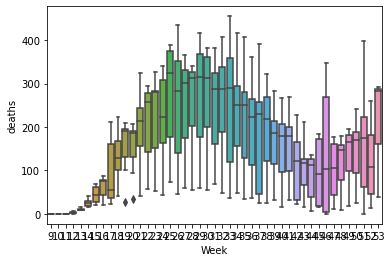

In [9]:
import seaborn as sns

covidSP['Week'] = covidSP.index.week

sns.boxplot(x=covidSP['Week'], y=covidSP['deaths'])

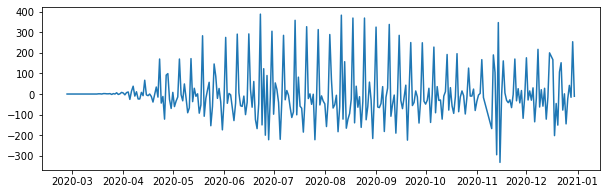

In [10]:
# Primeiras diferenças
y = np.diff(covidSP['deaths'])
x = covidSP.index[1:]


plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y)


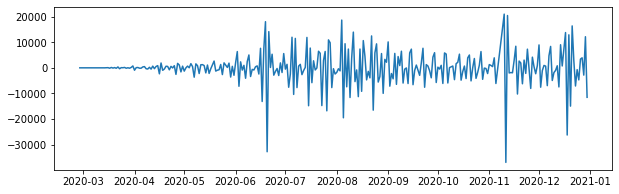

In [11]:
# Segundas diferenças

y = np.diff(np.diff(covidSP['confirmed']))
x = covidSP.iloc[2:].index


plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y);





<AxesSubplot:xlabel='Date'>

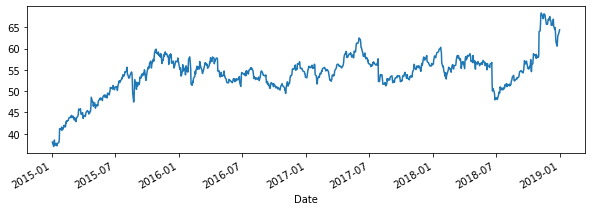

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
pkgdir = 'dados'

starbucks = pd.read_csv(f'{pkgdir}/starbucks.csv', index_col=0, parse_dates=True)

starbucks['Close'].plot()

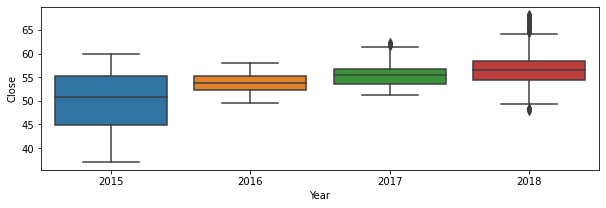

In [13]:
import seaborn as sns

starbucks['Year']= starbucks.index.year

x = sns.boxplot(x=starbucks['Year'], y=starbucks['Close'])

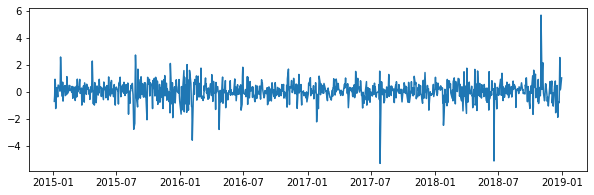

In [14]:
# Primeiras diferenças
y = np.diff(starbucks['Close'])
x = starbucks.iloc[1:].index

plt.plot(x,y);

**O Teste de Dickey-Fuller é usado para testar estacionariedade em um contexto de modelos autorregressivos.**

## Um teste para "alguma evidência sobre estacionariedade"


Considere inicialmente um modelo AR(1), que veremos com mais detalhes nas próximas aulas. 

$$Z_t = \phi Z_{t-1} + a_t$$

em que $a_t \sim RBN(0,\sigma^2)$.

Segue-se que 

$$\Delta Z_t = \phi^{\star} Z_{t-1} + a_t$$

no qual $ \phi^{\star}  = \phi-1$.

Queremos avaliar as hipóteses

$H_0: \phi^{\star} = 0$ contra

$H_1: \phi^{\star} < 0 $.

Para isso, diversos desenvolvimentos são necessários para se obter a estatística de teste, mas não daremos detalhes aqui!




Existem outros tipos de testes de hipóteses como esse, e muitos deles testam se:


$H_0: \mbox{ a série é não estacionária e contém uma raiz unitária}$

$H_1: \mbox{ a série é estacionária ou tendência-estacionária }$


Para mais informações, veja  (https://en.wikipedia.org/wiki/Unit_root_test)

O teste Dickey-Fuller aumentado também tem essa proposta  (https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test).

Para o Teste de Dickey-Fuller:

- Quando o valor-p é pequeno ($p < 0.05$, por exemplo), rejeitamos $H_0$ e portanto há evidências de que a série é estacionária ou tendência-estacionária. 

- Se o valor-p for grande ($p \geq 0.05$, por exemplo), não rejeitamos $H_0$ e a série não é estacionária e contém uma raiz unitária.


**Neste momento, vamos apenas aplicar o teste de Dickey-Fuller e verificar se há ou não evidências contra a estacionariedade da série**.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller


# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
pkgdir = 'dados'

passageiros = pd.read_csv(f'{pkgdir}/airline_passengers.csv', index_col=0, parse_dates=True)


In [16]:
# fonte: https://machinelearningmastery.com/time-series-data-stationary-python/

result = adfuller(passageiros['Milhares de passageiros'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Há evidências de que a série não seja estacionária!

In [17]:
result = adfuller(np.diff(passageiros['Milhares de passageiros']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Há evidências fracas de que a série das primeiras diferenças não seja estacionária!

In [18]:
result = adfuller(np.diff(np.diff(passageiros['Milhares de passageiros'])), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.384232
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Há evidências de que a série das segundas diferenças seja estacionária ou tendência-estacionária!

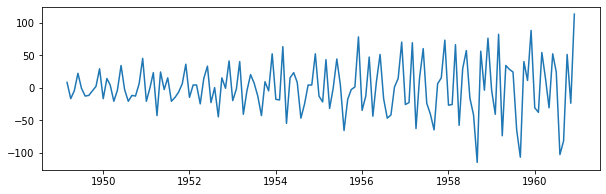

In [19]:
y = np.diff(np.diff(passageiros['Milhares de passageiros']))
x = passageiros.index[1:][1:]
            

plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y)

In [20]:
result = adfuller(covidSP['deaths'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.017376
p-value: 0.279007
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


Há evidências de que a série não seja estacionária!

In [21]:
result = adfuller(np.diff(covidSP['deaths']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.026969
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


Há evidências de que a série das primeiras diferenças seja estacionária ou tendência-estacionária!

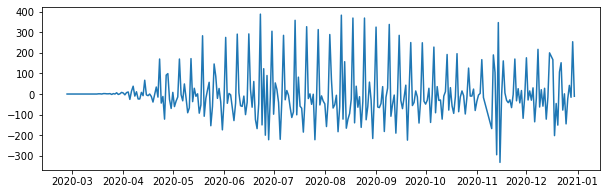

In [22]:
y = np.diff(covidSP['deaths'])
x = covidSP.index[1:]
            
    
plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y)

<AxesSubplot:xlabel='date'>

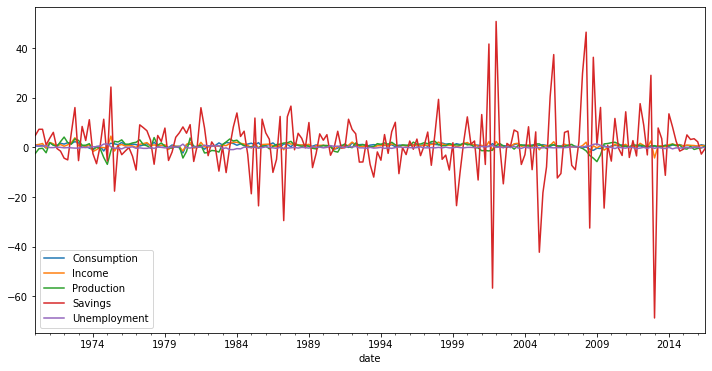

In [23]:
# dados US change

pkgdir = 'dados'

uschange = pd.read_csv(f'{pkgdir}/uschange.csv', index_col=0,
                       parse_dates=True)
uschange.index = uschange.index.to_period("Q")
uschange.plot(figsize=(12,6))

In [24]:

result = adfuller(uschange['Savings'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.705760
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Há fortes evidências para concluir que a série seja estacionária ou tendência-estacionária!

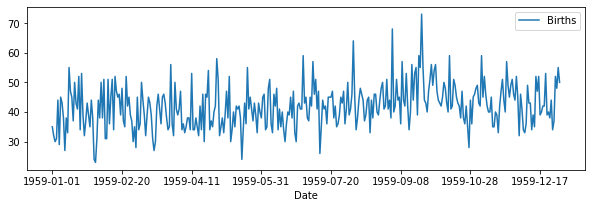

In [25]:
# Dados daily-total-female-births, cujo objetivo seria prever nascimentos diários de meninas


from pandas import read_csv
from matplotlib import pyplot

# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
pkgdir = 'dados'

plt.rcParams['figure.figsize'] = [10,3]
births = read_csv(f'{pkgdir}/daily-total-female-births.csv', header=0, index_col=0)

births.plot();

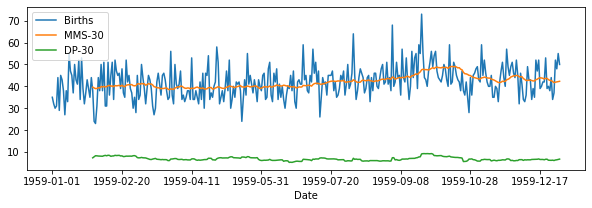

In [26]:
births['MMS-30'] = births['Births'].rolling(window=30).mean()
births['DP-30'] = births['Births'].rolling(window=30).std()


plt.rcParams['figure.figsize'] = [10,3]
births[['Births','MMS-30','DP-30']].plot();

In [27]:

result = adfuller(births['Births'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Há evidências de que a série seja estacionária ou tendência-estacionária!

**Exercício: Faça o teste para avaliar a estacionariedade dos dados do Starbucks. Existem evidências de que a série das primeiras diferenças é estacionária?**

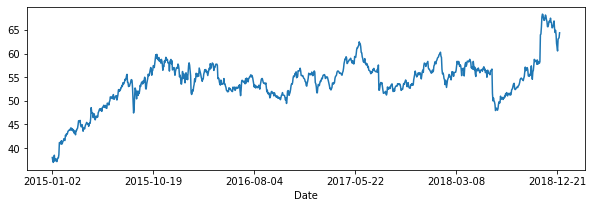

In [28]:
# Dados starbucks com a evolução do preço das ações

from pandas import read_csv
from matplotlib import pyplot

pkgdir = 'dados'

plt.rcParams['figure.figsize'] = [10,3]
starbucks = read_csv(f'{pkgdir}/starbucks.csv', header=0, index_col=0)

starbucks['Close'].plot();

In [29]:
starbucks.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

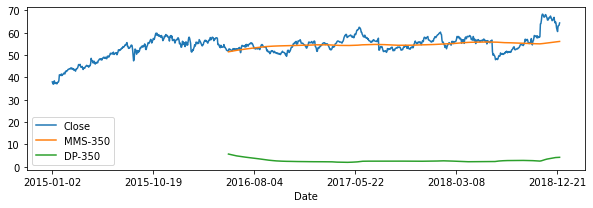

In [30]:
starbucks['MMS-350'] = starbucks['Close'].rolling(window=350).mean()
starbucks['DP-350'] = starbucks['Close'].rolling(window=350).std()


plt.rcParams['figure.figsize'] = [10,3]
starbucks[['Close','MMS-350','DP-350']].plot();

In [31]:
result = adfuller(starbucks['Close'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.048094
p-value: 0.030641
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Há evidências de que a série seja estacionária ou tendência-estacionária!

In [32]:
result = adfuller(np.diff(starbucks['Close']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -30.716482
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Há fortes evidências de que a série das primeiras diferenças seja estacionária ou tendência-estacionária!